In [1]:
import sys
sys.path.append('/data/programming/pipeline/in_development/Will')
sys.path.append('/data/programming/pipeline/src')
animal = 'DK55'
section = 180

In [2]:
from cell_extractor.CellDetectorBase import CellDetectorBase
base = CellDetectorBase('DK55',180)

In [111]:
import sys
import numpy as np
import pickle as pkl
from cell_extractor import compute_image_features 
import cv2
import pandas as pd
from cell_extractor.CellDetectorBase import CellDetectorBase,get_sections_with_annotation_for_animali
import os
class FeatureFinder(CellDetectorBase):
    """class to calculate feature vector for each extracted image pair (CH1, CH3)
    """
    def __init__(self,animal,section):
        super().__init__(animal,section)
        self.features = []
        print('DATA_DIR=%s'%(self.CH3))
        print(self.section,section)
        self.connected_segment_threshold=2000
        self.load_average_cell_image()
    
    def copy_information_from_examples(self,example):
        for key in ['animal','section','index','label','area','height','width']:
            self.featurei[key] = example[key]
        self.featurei['row'] = example['row']+example['origin'][0]
        self.featurei['col'] = example['col']+example['origin'][1]

    def calculate_correlation_and_energy(self,example,channel = 3):
        image = example[f'image_CH{channel}']
        average_image = getattr(self, f'average_image_ch{channel}')
        corr,energy = compute_image_features.calc_img_features(image,average_image)
        self.featurei[f'corr_CH{channel}'] = corr
        self.featurei[f'energy_CH{channel}'] = energy

    def connected_segment_detected_in_image(self,example,channel = 3):
        image = example[f'image_CH{channel}']
        Stats=cv2.connectedComponentsWithStats(np.int8(image>self.connected_segment_threshold))
        return Stats[1] is not None
    
    def get_middle_segment_mask(self,segments):
        middle=np.array(np.array(segments.shape)/2,dtype=np.int16)
        middle_seg=segments[middle[0],middle[1]]
        middle_seg_mask = np.uint8(segments==middle_seg)
        return middle_seg_mask
    
    def calculate_moments(self,middle_seg_mask):
        return cv2.moments(middle_seg_mask)
    
    def calculate_hu_moments(self,moments):
        return cv2.HuMoments(moments)
    
    def features_using_center_connectd_components(self,example):
        image1 = example[f'image_CH1']
        image3 = example[f'image_CH3']
        no,mask,statistics,center=cv2.connectedComponentsWithStats(np.int8(image3>self.connected_segment_threshold))
        middle_seg_mask = None
        if mask is not None:
            middle_segment_mask = self.get_middle_segment_mask(mask) 
            example['middle_segment_mask']=middle_segment_mask
            center_comp_features = self.calc_center_features(image1,image3, middle_segment_mask)
        return middle_segment_mask
   
    def calc_center_features(self,image1,image3, mask):
        def mask_mean(mask,image):
            mean_in=mean(image[mask==1])
            mean_all=mean(image.flatten())
            return (mean_in-mean_all)/(mean_in+mean_all)

        def append_string_to_every_key(dictionary, post_fix): 
            return dict(zip([keyi + post_fix for keyi in dictionary.keys()],dictionary.values()))
        
        #calc moments of mask
        moments = self.calculate_moments(mask)
        moments = append_string_to_every_key(moments,f'CH_3')
        self.featurei.update(moments)
        huMoments = self.calculate_hu_moments(moments)
        self.featurei.update({'h%d'%i+f'_CH_3':huMoments[i,0]  for i in range(7)})
        
        # Calc contrasts relative to mask
        self.featurei['contrast1']=mask_mean(mask,image1)
        self.featurei['contrast3']=mask_mean(mask,image3)

    def calculate_features(self):
        """ Master function, calls methods to calculate the features that are then stored in self.features
        """
        self.load_examples()
        for tilei in range(len(self.Examples)):
            print(tilei)
            examplei = self.Examples[tilei]
            if examplei != []:
                for i in range(len(examplei)):
                    example=examplei[i]
                    self.featurei={}
                    self.copy_information_from_examples(example)
                    self.calculate_correlation_and_energy(example,channel=1)
                    self.calculate_correlation_and_energy(example,channel=3)
                    self.features_using_center_connectd_components(example)
                    self.features.append(self.featurei)
    
    def load_average_cell_image(self):
        ### Use try, except to catch problems reading files.
        if os.path.exists(self.AVERAGE_CELL_IMAGE_DIR):
            average_image = pkl.load(open(self.AVERAGE_CELL_IMAGE_DIR,'rb'))
            self.average_image_ch1 = average_image['CH1']
            self.average_image_ch3 = average_image['CH3']

def test_one_section(animal,section):
    finder = FeatureFinder(animal,section)
    finder.calculate_features()
    finder.save_features()
    return finder

In [112]:
finder=test_one_section(animal,section)

DATA_DIR=/data/cell_segmentation/DK55/CH3
180 180
0
1
2
3
4
5
6
df shape= (7, 46) output_file= /data/cell_segmentation/DK55/CH3/180/puntas_180.csv


In [118]:
[len(f) for f in finder.features]

[46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,


In [115]:
finder.Examples[0][0]

{'animal': 'DK55',
 'section': 180,
 'index': 0,
 'label': 0,
 'area': 81,
 'row': 4903,
 'col': 27687,
 'origin': array([0, 0], dtype=int32),
 'height': 13,
 'width': 11,
 'image_CH3': array([[-62.43787 , -62.524147, -62.610424, ..., -66.121956, -66.07814 ,
         -66.03433 ],
        [-62.667503, -62.754223, -62.84095 , ..., -66.38106 , -66.337265,
         -66.29347 ],
        [-62.897133, -62.984303, -63.071472, ..., -66.64016 , -66.59638 ,
         -66.55261 ],
        ...,
        [-76.10722 , -76.207634, -76.30804 , ..., 431.41428 , 433.47452 ,
         433.5348  ],
        [-76.222786, -76.32321 , -76.42363 , ..., 363.30438 , 443.36493 ,
         433.42548 ],
        [-76.338356, -76.43879 , -76.53922 , ..., 249.19449 , 369.25534 ,
         441.31616 ]], dtype=float32),
 'image_CH1': array([[  68.02551 ,   68.483765,   68.941895, ...,   66.46631 ,
           66.98682 ,   67.50745 ],
        [  60.631958,   61.083984,   61.53589 , ...,   58.56958 ,
           59.08728 ,   59.6

In [55]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


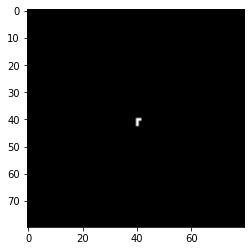

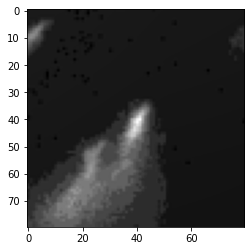

In [68]:
i=4
imshow(finder.Examples[3][i]['middle_segment_mask'],cmap='gray')
figure()
imshow(finder.Examples[3][i]['image_CH3'],cmap='gray')

In [96]:
def mask_mean(mask,image):
    mean_in=mean(image[mask==1])
    mean_all=mean(image.flatten())
    return (mean_in-mean_all)/(mean_in+mean_all)
mask_mean(mask,image)

0.3184697

In [103]:
len(E)

2439

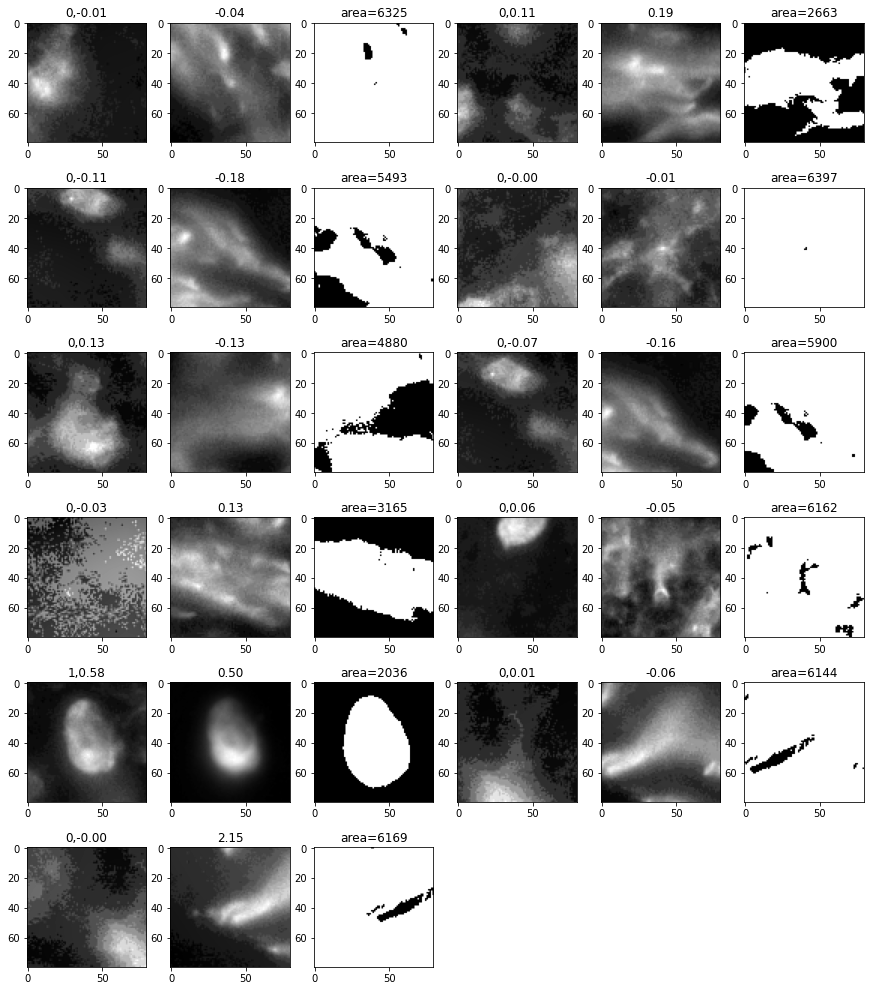

In [104]:
plt.figure(figsize=[15,45])
tile=3
E=finder.Examples[tile]
j=0
for i in range(1000,len(E)):
    e=E[i]
    area=sum(e['middle_segment_mask'].flatten())
    label=e['label']
    if area<1000:
        continue
    subplot(15,6,3*j+1)
    mask=e['middle_segment_mask']
    imshow(e['image_CH1'],cmap='gray')
    title('%d,%4.2f'%(label,mask_mean(mask,e['image_CH1'])))
    subplot(15,6,3*j+2)
    imshow(e['image_CH3'],cmap='gray')
    title('%4.2f'%mask_mean(mask,e['image_CH3']))
    subplot(15,6,3*j+3)
    imshow(e['middle_segment_mask'],cmap='gray')
    title('area=%d'%area)
    j+=1
    if j>10:
        break

In [83]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [84]:
sum(mask.flatten())

3711

In [95]:
image=e['image_CH1']

In [91]:
mean(image[mask==1])

19451.453

In [92]:
mean(image.flatten())

10054.652